<a href="https://colab.research.google.com/github/likeaAI/ai_study/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D 
from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy  as np
import pandas as pd




In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-04-28 13:09:01.624438: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 13:09:01.624511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13565933454999534174
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 5523394490116781644
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

In [6]:
img = image.load_img('C:/Users/crid2/ml-data/test_dog.png' , target_size = (100,100))
img

# 이미지를 학습하기 위해서는 넘파이 배열로 변환해야 한다. 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/crid2/ml-data/test_dog.png'

In [7]:
print('rows - width , cols - height , channels - rgb')
img = image.img_to_array(img)
img = np.expand_dims(img , axis = 0) 
image_ = np.vstack([img]) 
image_.shape
# rgb code가 있어서 채널이 3개다.

rows - width , cols - height , channels - rgb


NameError: name 'img' is not defined

In [8]:
print('CNN - Convolution Neural Network 합성곱 신경망 - ')
print('CNN 핵심 - 합성곱레이어와 풀링레이어')
print('padding  - valid , same')
print('filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이')
print('kernel_size - 연산을 수행할 때 원도우의 크기')
print('strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정')
model = Sequential() 

model.add( Conv2D(input_shape = (10, 10, 3) , 
                  filters = 10 , 
                  kernel_size = (3,3) , 
                  strides = (1,1) , 
                  padding = 'same') )

CNN - Convolution Neural Network 합성곱 신경망 - 
CNN 핵심 - 합성곱레이어와 풀링레이어
padding  - valid , same
filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이
kernel_size - 연산을 수행할 때 원도우의 크기
strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정


2022-04-28 13:09:02.164604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 13:09:02.164651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


- CNN - Convolution Neural Network 합성공 신경망 - 
- CNN 핵심 - 합성곱레이어와 플링레이어 
- padding - valid, smae 
- kernel_size - 연산을 수행할때 윈도우 크기 
- strides - 가로 세로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정 

In [9]:
model.output_shape

(None, 10, 10, 10)

In [10]:
print('풀링 - pooling ')
print('원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - ')
print()

# model.add( MaxPooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
# print(model.output_shape)

model.add( AveragePooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
print(model.output_shape)


풀링 - pooling 
원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - 

(None, 9, 9, 10)


In [11]:
datasets = load_digits()
datasets.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
datasets.images[0].shape # 왜 채널이 없을까 흑백이라서 1차원으로 본다. 컬러풀은 3차원...  

(8, 8)

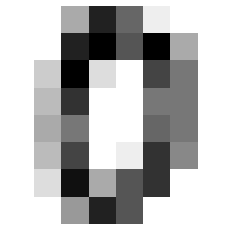

In [13]:
plt.figure()

plt.imshow(datasets.images[0] , cmap = plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

In [14]:
datasets.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
X_data = datasets.images
y_data = datasets.target 

In [16]:
X_data.shape, y_data.shape

((1797, 8, 8), (1797,))

In [17]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1] ,  X_data.shape[2], 1 )
X_data.shape # 채널 1이 있어야 학습이 가능해서 위의 모양대로 reshape을 하였다. 

(1797, 8, 8, 1)

In [18]:
y_data = to_categorical(y_data)
y_data.shape

(1797, 10)

In [19]:
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_data.shape , y_data.shape

((1797, 8, 8, 1), (1797, 10))

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X_data , 
                                                       y_data , 
                                                       test_size    = 0.2 ,
                                                       random_state = 111)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [22]:
print('cnn 입력층 - ')
mnist_cnn_model = Sequential()
mnist_cnn_model.add( Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]) , 
                            filters = 10 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'valid' , activation = 'relu') ) 

print('shape - ' , mnist_cnn_model.output_shape)

cnn 입력층 - 
shape -  (None, 6, 6, 10)


In [23]:
print('cnn 풀링레이어 만들기 - ')

mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
print(mnist_cnn_model.output_shape)


cnn 풀링레이어 만들기 - 
(None, 3, 3, 10)


In [24]:
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.output_shape

(None, 90)

In [25]:
mnist_cnn_model.add( Dense(50 , activation = 'relu'))
mnist_cnn_model.add( Dense(10 , activation = 'softmax'))

In [26]:
mnist_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 6, 10)          100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 10)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense (Dense)               (None, 50)                4550      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

In [27]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [28]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=100  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/100


2022-04-28 13:09:06.001103: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-28 13:09:06.167295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 15ms/step - loss: 2.3065 - accuracy: 0.4273 - val_loss: 0.9834 - val_accuracy: 0.7604
Epoch 2/100
15/23 [==================>...........] - ETA: 0s - loss: 0.5304 - accuracy: 0.8520

2022-04-28 13:09:06.555032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 10ms/step - loss: 0.4344 - accuracy: 0.8799 - val_loss: 0.2570 - val_accuracy: 0.9028
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1590 - accuracy: 0.9452 - val_loss: 0.2334 - val_accuracy: 0.9236
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0977 - accuracy: 0.9695 - val_loss: 0.1486 - val_accuracy: 0.9444
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0809 - accuracy: 0.9730 - val_loss: 0.1598 - val_accuracy: 0.9340
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0526 - accuracy: 0.9826 - val_loss: 0.1875 - val_accuracy: 0.9340
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0478 - accuracy: 0.9835 - val_loss: 0.1124 - val_accuracy: 0.9653
Epoch 8/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.1677 - val_accuracy: 0.9375
Epoch 9/100
23/23 

23/23 [==============================] - 0s 9ms/step - loss: 1.2112e-04 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 0.9722
Epoch 59/100
23/23 [==============================] - 0s 10ms/step - loss: 1.1754e-04 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 60/100
23/23 [==============================] - 0s 10ms/step - loss: 1.1319e-04 - accuracy: 1.0000 - val_loss: 0.0940 - val_accuracy: 0.9722
Epoch 61/100
23/23 [==============================] - 0s 10ms/step - loss: 1.1027e-04 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 62/100
23/23 [==============================] - 0s 10ms/step - loss: 1.0562e-04 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9722
Epoch 63/100
23/23 [==============================] - 0s 10ms/step - loss: 1.0293e-04 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 64/100
23/23 [==============================] - 0s 9ms/step - loss: 1.0214e-04 - accuracy: 1.0000 - val_loss: 0.0951 - val_acc

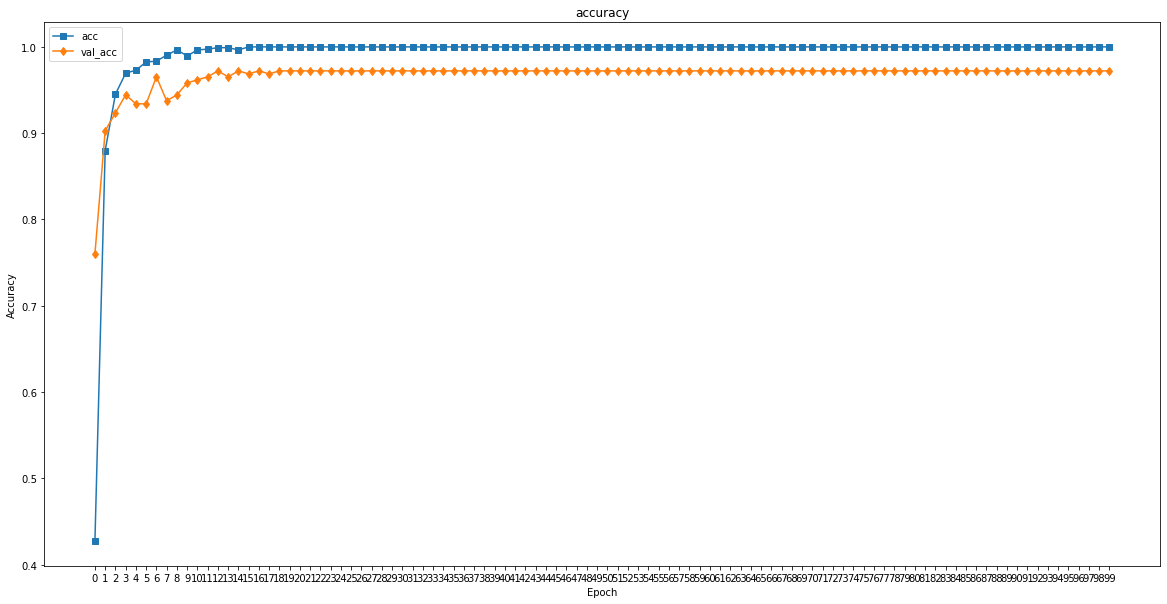

In [29]:
plt.figure(figsize=(20,10))

plt.plot(mnist_cnn_model_history.history['accuracy']    , 's-', label='acc')
plt.plot(mnist_cnn_model_history.history['val_accuracy'], 'd-', label='val_acc')

plt.legend(loc='best')
plt.xticks(np.arange(100))
plt.title('accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [30]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test , y_test)
mnist_cnn_model_eval

12/12 [==============================] - 0s 7ms/step - loss: 0.1386 - accuracy: 0.9806


[0.13858336210250854, 0.9805555939674377]

mnist 이용한 CNN

In [31]:
(X_train,y_train),(X_test, y_test)= mnist.load_data()

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

In [32]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2], 1 )
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , X_test.shape[2], 1 )

In [33]:
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

(((60000, 28, 28, 1), (60000,)), ((10000, 28, 28, 1), (10000,)))

In [34]:
# 데이터 전처리 - 

X_train, X_test = X_train/255 , X_test/255

In [35]:

mnist_cnn_model = Sequential()
#1 
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 32 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 64 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#3 
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 64 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))




In [36]:
# CNN 입력층 생성 
mnist_cnn_model.output_shape

(None, 4, 4, 64)

feature extraction - 

In [37]:
print('Dense 층 추가 - ')
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.add( Dense(units = 512) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 256) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 128) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 64) )
mnist_cnn_model.add( Activation('relu') )

mnist_cnn_model.add( Dense(units = 10) )
mnist_cnn_model.add( Activation('softmax') )


# mnist_cnn_model.output_shape

Dense 층 추가 - 


In [38]:
mnist_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)        

In [39]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [40]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=12  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/12
  1/960 [..............................] - ETA: 5:27 - loss: 2.3026 - accuracy: 0.1200

2022-04-28 13:09:29.994035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


958/960 [============================>.] - ETA: 0s - loss: 2.3067 - accuracy: 0.1104

2022-04-28 13:09:40.342335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


960/960 [==============================] - 12s 12ms/step - loss: 2.3066 - accuracy: 0.1106 - val_loss: 2.3030 - val_accuracy: 0.1060
Epoch 2/12
960/960 [==============================] - 11s 12ms/step - loss: 2.3022 - accuracy: 0.1121 - val_loss: 2.3042 - val_accuracy: 0.1060
Epoch 3/12
960/960 [==============================] - 11s 12ms/step - loss: 2.3022 - accuracy: 0.1126 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 4/12
960/960 [==============================] - 11s 12ms/step - loss: 2.3021 - accuracy: 0.1115 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 5/12
960/960 [==============================] - 11s 12ms/step - loss: 2.3022 - accuracy: 0.1118 - val_loss: 2.3039 - val_accuracy: 0.1060
Epoch 6/12
960/960 [==============================] - 11s 12ms/step - loss: 2.3022 - accuracy: 0.1128 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/12
960/960 [==============================] - 11s 12ms/step - loss: 2.3021 - accuracy: 0.1126 - val_loss: 2.3023 - val_accuracy: 0.1060
Epo

In [41]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test, y_test)
mnist_cnn_model_eval

 17/313 [>.............................] - ETA: 1s - loss: 2.2980 - accuracy: 0.1324

2022-04-28 13:11:45.868269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 2.3016 - accuracy: 0.1135


[2.301569938659668, 0.11350000649690628]

In [42]:
print('모델 저장')
mnist_cnn_model.save('model-case.h12')

모델 저장


2022-04-28 13:11:48.069949: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model-case.h12/assets


In [43]:
print('모델 복원')
loaded_model = load_model('model-case.h12')
loaded_model.summary()

모델 복원


NameError: name 'load_model' is not defined

In [ ]:
loss , acc = loaded_model.evaluate(X_test , y_test)
print('loss - ' , loss)
print('acc  - ' , acc)

이미지 분류 (horse-or-human)

In [ ]:
import os 
print('데이터 세트 경로 - ')
train_horse_dir = '/Users/book/Downloads/horse-or-human/horses'
train_human_dir = '/Users/book/Downloads/horse-or-human/humans'

In [ ]:
train_horse_fileName = os.listdir(train_horse_dir)
train_human_fileName = os.listdir(train_human_dir)

In [ ]:
train_horse_fileName[0:10]

In [ ]:
train_human_fileName[0:10]

In [ ]:
print('총 이미지 갯수 - ')
print('horse len - ' , len(train_horse_fileName))
print('human len - ' , len(train_human_fileName))

# 'C:/Users/crid2/ml-data/horse-or-human' 

In [ ]:
train_img_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_img_generator.flow_from_directory(
    '/Users/book/Downloads/horse-or-human' , 
    target_size = (300, 300) , 
    batch_size  = 128 ,
    class_mode = 'binary'
)

In [ ]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (300, 300, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 1) )
  img_model.add( Activation('sigmoid') )

  return img_model 

In [ ]:
model = img_model()
model.summary()

In [ ]:
model.compile(optimizer = RMSprop(lr = 0.001), 
                      loss= 'binary_crossentropy' , 
                      metrics=['accuracy'] ) 

In [ ]:
model_history = model.fit(train_generator , epochs = 15 , verbose = 1 , steps_per_epoch = 8 )

In [ ]:
from google.colab import files

upload_img = files.upload()
print(upload_img)
print(upload_img.keys())

for fn in upload_img.keys() :
  print('file name - ' , fn )
  path = '/content/'+fn
  img = image.load_img(path , target_size = (300, 300))
  x   = image.img_to_array(img) 
  x   = np.expand_dims(x , axis = 0 ) 
  image_ = np.vstack([x])

  classes = model.predict(image_ , batch_size = 10 ) 
  print('pred - ' , classes[0])
print('예측하기 - ')


In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /downloads/cats_and_dogs_filtered.zip


고양이 개 이미지 분류 실습하기 

In [ ]:
import os
import zipfile

path = '/Users/book/Downloads/cats_and_dogs_filtered.zip' 
zip  = zipfile.ZipFile(path , 'r')

zip.extractall('/Users/book/Downloads/')
zip.close()

In [44]:
cat_image = '/Users/book/Downloads/cats_and_dogs_filtered/train/cats/'
dog_image = '/Users/book/Downloads/cats_and_dogs_filtered/train/dogs/'

In [45]:
train_img_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_img_generator.flow_from_directory(
    '/Users/book/Downloads/cats_and_dogs_filtered/train/' , 
    target_size = (300, 300) , 
    batch_size  = 128 ,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
